In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]= (10,2)
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.impute import KNNImputer
import sys
sys.path.append("D:/NILM/code/")
from common import sliderPlot, scatter, create_features
from main import NILM


In [2]:
lst = NILM()
df= lst[0]
df

data read done
transormation done


,wm_A,wm_V,wm_C
timestamp,,,
2013-06-14 01:22:10,217.19,230.94,0.949
2013-06-14 01:22:11,225.95,231.01,0.987
2013-06-14 01:22:12,223.33,230.90,0.975
2013-06-14 01:22:13,225.19,230.93,0.983
2013-06-14 01:22:14,221.81,230.98,0.969
...,...,...,...
2013-07-31 02:50:35,359.34,238.37,1.509
2013-07-31 02:50:36,343.71,238.43,1.443
2013-07-31 02:50:37,341.08,238.33,1.434


In [3]:
df.isna().sum()

wm_A    6778
wm_V    6778
wm_C    6778
dtype: int64

In [4]:
df = create_features(df)
original_timestamps = df.index
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = knn_imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df['Timestamp'] = original_timestamps
imputed_df.set_index(['Timestamp'],drop=True,inplace=True)
sliderPlot(df['wm_A'].loc['2013-06-17'],t="line")
sliderPlot(imputed_df['wm_A'].loc['2013-06-17'],t="line")

In [5]:
imputed_df

,wm_A,wm_V,wm_C,sec,minute,hour,day,dayofweek,weekofyear,month
Timestamp,,,,,,,,,,
2013-06-14 01:22:10,217.19,230.94,0.949,10.0,22.0,1.0,14.0,4.0,24.0,6.0
2013-06-14 01:22:11,225.95,231.01,0.987,11.0,22.0,1.0,14.0,4.0,24.0,6.0
2013-06-14 01:22:12,223.33,230.90,0.975,12.0,22.0,1.0,14.0,4.0,24.0,6.0
2013-06-14 01:22:13,225.19,230.93,0.983,13.0,22.0,1.0,14.0,4.0,24.0,6.0
2013-06-14 01:22:14,221.81,230.98,0.969,14.0,22.0,1.0,14.0,4.0,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...
2013-07-31 02:50:35,359.34,238.37,1.509,35.0,50.0,2.0,31.0,2.0,31.0,7.0
2013-07-31 02:50:36,343.71,238.43,1.443,36.0,50.0,2.0,31.0,2.0,31.0,7.0
2013-07-31 02:50:37,341.08,238.33,1.434,37.0,50.0,2.0,31.0,2.0,31.0,7.0


In [9]:
df1 = imputed_df[["wm_A","wm_V","wm_C"]]
# df.reset_index(inplace=True)
df1

,wm_A,wm_V,wm_C
Timestamp,,,
2013-06-14 01:22:10,217.19,230.94,0.949
2013-06-14 01:22:11,225.95,231.01,0.987
2013-06-14 01:22:12,223.33,230.90,0.975
2013-06-14 01:22:13,225.19,230.93,0.983
2013-06-14 01:22:14,221.81,230.98,0.969
...,...,...,...
2013-07-31 02:50:35,359.34,238.37,1.509
2013-07-31 02:50:36,343.71,238.43,1.443
2013-07-31 02:50:37,341.08,238.33,1.434


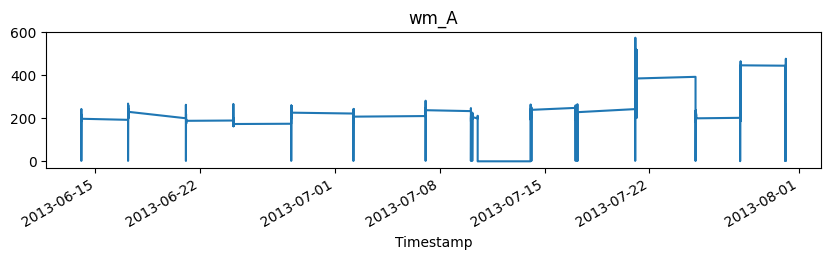

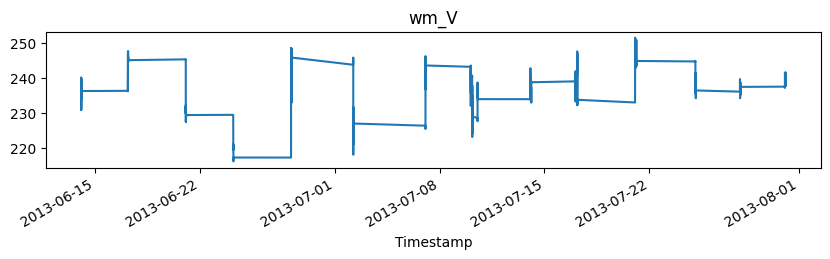

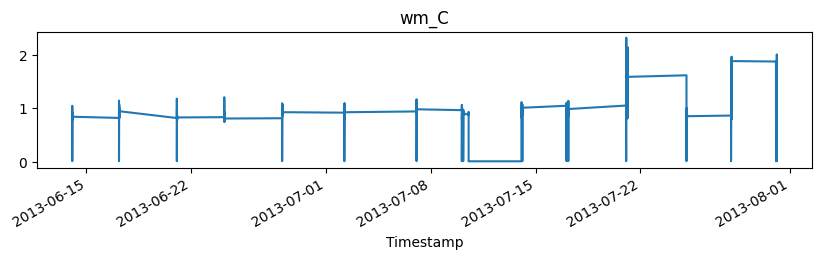

In [10]:
for i in [0,1,2]:
    df1[df1.columns[i]].plot()
    plt.title(df1.columns[i])
    plt.show()
    

In [11]:
start_datetime = '2013-06-12 00:00:00'
end_datetime = '2013-08-03 23:59:59'
datetime_index = pd.date_range(start=start_datetime, end=end_datetime, freq='S')

df = pd.DataFrame(index=datetime_index, columns=df1.columns)
# df.index.name = 'timestamp'
df3 = df.combine_first(df1)
df3.index.name = 'timestamp'
df3

,wm_A,wm_V,wm_C
timestamp,,,
2013-06-12 00:00:00,NaN,NaN,NaN
2013-06-12 00:00:01,NaN,NaN,NaN
2013-06-12 00:00:02,NaN,NaN,NaN
2013-06-12 00:00:03,NaN,NaN,NaN
2013-06-12 00:00:04,NaN,NaN,NaN
...,...,...,...
2013-08-03 23:59:55,NaN,NaN,NaN
2013-08-03 23:59:56,NaN,NaN,NaN
2013-08-03 23:59:57,NaN,NaN,NaN


In [12]:
df3.value_counts().sum()


27663

In [13]:
df3.fillna(value=0,inplace=True)

In [14]:
df3.to_csv("d://clean_data/c_wm.csv")

In [15]:
df = pd.read_csv("d:/clean_data/c_wm.csv")
df

,timestamp,wm_A,wm_V,wm_C
0,2013-06-12 00:00:00,0.0,0.0,0.0
1,2013-06-12 00:00:01,0.0,0.0,0.0
2,2013-06-12 00:00:02,0.0,0.0,0.0
3,2013-06-12 00:00:03,0.0,0.0,0.0
4,2013-06-12 00:00:04,0.0,0.0,0.0
...,...,...,...,...
4579195,2013-08-03 23:59:55,0.0,0.0,0.0
4579196,2013-08-03 23:59:56,0.0,0.0,0.0
4579197,2013-08-03 23:59:57,0.0,0.0,0.0
4579198,2013-08-03 23:59:58,0.0,0.0,0.0


In [ ]:
df = pd.read_csv("d://cleanwashing_machine.csv")
df

In [ ]:
print(df.columns)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.info()

In [ ]:
# print(df.columns)
df.set_index(['Timestamp'],inplace=True, drop= True)
sliderPlot(df['wm_A'].loc['2013/06/17'],t="line")

In [ ]:
df1 = imputed_df[['wm_A', 'wm_V', 'wm_C']]
# imputed_df.columns
df1.reset_index(inplace=True)
df1.to_csv("D://cleanwashing_machine.csv")

In [ ]:
lst = ['wm']
path = "d:/NILM/Data_files/Parquet/Appliances12_06_04_08/"
print("data read done")
""" data ingestion done """

""" data transformation """
complete_data_lst = [] # empty list to store final data set of all appliances
for i in range(len(lst)):
    df = pd.read_parquet(f"{path}{lst[i]}.parquet")
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.drop_duplicates(inplace=True)  
    df.set_index(['timestamp'],inplace=True ,drop=True)
    df.drop(df[(df['frequency']>51) | (df['frequency']<49)].index, inplace=True)
    df.drop(df[(df['PF']>1) | (df['PF']<0)].index, inplace=True)
    # df.drop(df[(df['current']>20) |(df['current']<0.07)].index, inplace=True)
    df.drop(df[df['voltage']<140].index, inplace=True)
    
    # power is active power derived from voltage current and pf
    df['power'] = (df['voltage'] * df['current'] * df['PF']).round(2)
    
    if lst[i]=="f":
        df_appliance = df[['power',"voltage",'current']].resample(rule="1s").asfreq()
        df_appliance = df_appliance.rename(columns={'power': f'{lst[i]}_A', 'voltage': f'{lst[i]}_V', 'current': f'{lst[i]}_C'})
    else:
        df_sample_lst = [] # empty list for storing resampled data at 1sec frequency of each hour
        unique_dates = pd.Series(df.index.date).unique()
        for date1 in unique_dates: # dates when applince is on                             
            df_date = df[df.index.to_series().dt.date == date1] # dataframe of that perticular date
            hours = df_date.index.hour.unique() # hours when appliance is on
            for h in hours:
                date2 = f"{date1} {h:02d}"
                df_hour = df_date.loc[date2] # dataframe of that perticular hour at which appliance was on
                mins = df_hour.index.minute.unique()
                for m in mins:
                    date3 = f"{date2}{m:02d}"
                    df_min = df_hour.loc[date3]
                    df_resampled_min = df_min[['power',"voltage",'current']].resample(rule="1s").asfreq()
                    df_sample_lst.append(df_resampled_min) # adding each hour data in lst
        df_appliance = pd.concat(df_sample_lst) # concating all hours data into single data frame with missing values within signature
        df_appliance = df_appliance.rename(columns={'power': f'{lst[i]}_A', 'voltage': f'{lst[i]}_V', 'current': f'{lst[i]}_C'})
        # df_appliance = create_features(df_appliance)
    complete_data_lst.append(df_appliance) # all applince data in list

In [ ]:
df = complete_data_lst[0]
df

In [ ]:
df.isna().sum()

In [ ]:
df = create_features(df)
original_timestamps = df.index
knn_imputer = KNNImputer(n_neighbors=1)
imputed_data = knn_imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df['Timestamp'] = original_timestamps
imputed_df.set_index(['Timestamp'],drop=True,inplace=True)
sliderPlot(df['wm_A'].loc['2013-06-17'],t="line")
sliderPlot(imputed_df['wm_A'].loc['2013-06-17'],t="line")

In [ ]:
df[['wm_A']].loc['2013-06-17'].isna().sum()

In [ ]:
df1

In [ ]:
original_timestamps = df.index
knn_imputer = KNNImputer(n_neighbors=2)
imputed_data = knn_imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df['Timestamp'] = original_timestamps
imputed_df.set_index(['Timestamp'],drop=True,inplace=True)
sliderPlot(df['wm_A'].loc['2013-06-17'],t="line")
sliderPlot(imputed_df['wm_A'].loc['2013-06-17'],t="line")


In [ ]:
original_timestamps = df.index
knn_imputer = KNNImputer(n_neighbors=3)
imputed_data = knn_imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)
imputed_df['Timestamp'] = original_timestamps
imputed_df.set_index(['Timestamp'],drop=True,inplace=True)
sliderPlot(df['wm_A'].loc['2013-06-17'],t="line")
sliderPlot(imputed_df['wm_A'].loc['2013-06-17'],t="line")

In [ ]:
sliderPlot(imputed_df['wm_A'],t="line")

In [ ]:
sliderPlot(imputed_df['wm_A'])